# 1. Nạp và xử lý dữ liệu

Nếu chưa có thư viện của python, hãy chạy dòng ở dưới

In [ ]:
pip install numpy pandas seaborn matplotlib scikit-learn

In [2]:
import math
import time
import numpy as np 
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
# Training data path here
df = pd.read_csv('https://raw.githubusercontent.com/aCoderChild/Kaggle-and-AI/refs/heads/main/Final%20Test/data/train.csv')

# Test data path here
df_test = pd.read_csv('https://raw.githubusercontent.com/aCoderChild/Kaggle-and-AI/refs/heads/main/Final%20Test/data/test.csv')

In [4]:
def preprocessing_data(df):
    person_education_mapping = {'High School': 0,'Associate': 1,'Bachelor': 2,'Master': 3,'Doctorate':4}
    gender_mapping = {'male': 0, 'female': 1}
    home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
    loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
    previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}
    
    df['person_education'] = df['person_education'].map(person_education_mapping)
    df['person_gender'] = df['person_gender'].map(gender_mapping)
    df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
    df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
    df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)

    return df

In [5]:
# Mapping data
df = preprocessing_data(df)
df_test = preprocessing_data(df_test)

In [6]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,3,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,1,0,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,1,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,0,3,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32994,35.0,0,0,87428.0,10,2,12888.0,2,6.47,0.15,7.0,664,1,0
32995,26.0,1,2,91318.0,6,2,8000.0,3,14.92,0.09,5.0,590,1,0
32996,23.0,1,2,79749.0,0,0,16800.0,0,11.28,0.21,2.0,632,0,0
32997,25.0,0,0,51450.0,1,0,6000.0,2,12.48,0.12,3.0,661,0,0


In [7]:
df_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,28.0,1,3,66896.0,7,1,18000.0,0,13.75,0.27,6.0,658,1,0
1,26.0,1,1,34023.0,4,0,2221.0,2,12.47,0.07,4.0,636,1,0
2,26.0,1,2,152320.0,2,2,14970.0,0,8.24,0.10,4.0,602,1,0
3,24.0,1,1,37218.0,3,0,6000.0,1,11.62,0.16,2.0,694,0,0
4,32.0,0,2,84893.0,8,2,11233.0,5,9.26,0.13,6.0,681,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,27.0,0,1,47971.0,6,0,15000.0,2,15.66,0.31,3.0,645,0,1
11996,37.0,1,1,65800.0,17,0,9000.0,4,14.07,0.14,11.0,621,0,1
11997,33.0,0,1,56942.0,7,0,2771.0,5,10.02,0.05,10.0,668,0,1
11998,29.0,0,2,33164.0,4,0,12000.0,1,13.23,0.36,6.0,604,0,1


In [8]:
# Training data 
X_train = df.drop(['loan_status'], axis = 1)
# Label for training data
y_train = df['loan_status']

In [9]:
# Test data
X_test = df_test.drop(['loan_status'], axis = 1)
# Label for test data
y_test = df_test['loan_status']

# 2. Xây dựng thuật toán XGBoost

In [10]:
class XGBClassifier():
    '''
        Model tái hiện một phần của model xgboost trong thư viện
        Dựa trên paper về XGBoost: https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf
        Model không tái hiện được toàn bộ chức năng của xgboostclassifier trong thư viện xgb
        Model này sử dụng tree_method = 'exact'
    '''
    def __init__(self, params, random_seed=None):
        '''
            Hàm khởi tạo của XGBoostModel

            params: Tập tham số đầu vào
            random_seed: số ngẫu nhiên để làm seed cho các lần random
        '''
        self.params = defaultdict(lambda: None, params)
        
        # Subsample thể hiện số lượng data sử dụng cho mỗi lần boost
        if 'subsample' in self.params and self.params['subsample']:
            self.subsample = self.params['subsample']
        else:
            self.subsample = 1.0
        
        # Learning rate nằm trong khoảng [0,1]. Đại diện cho tỷ lệ mỗi bước di chuyển để hội tụ
        if 'learning_rate' in self.params and self.params['learning_rate']:
            self.learning_rate = self.params['learning_rate']
        else:
            self.learning_rate = 0.3

        # Giá trị dự đoán ban đầu của model tự thiết lập trước khi train
        if 'base_score' in params and params['base_score']:
            self.base_score = params['base_score']
        else:
            self.base_score = 0.5

        # Độ cao tối đa của một cây, giá trị trong khoảng [1,∞]. 
        if 'max_depth' in params and params['max_depth']:
            self.max_depth = params['max_depth']
        else:
            self.max_depth = 5
            
        # Random_seed
        self.rng = np.random.default_rng(seed=random_seed)

    
    def fit(self, X, y, LossFunction, n_estimators):
        '''
            Nạp data cho model và thực hiện train
            
            X: dữ liệu train
            y: nhãn của dữ liệu train
            LossFunction: Hàm mục tiêu
            n_estimators: Số lần thực hiện boost hay số cây sẽ xây dựng
        '''
        # Khởi tạo mảng prediction với kích thước của data và chỉ gồm self.base_score (mặc định 0.5)
        current_predictions = self.base_score * np.ones(shape=y.shape)
        # Mảng lưu lại các cây
        self.TreeBoosters = []
        for i in range(n_estimators):

            # Tính gradients và hessians dựa trên lần đoán trước 
            gradients = LossFunction.gradient(y, current_predictions)
            hessians = LossFunction.hessian(y, current_predictions)

            # Lấy toàn bộ hoặc một phần dữ liệu
            if self.subsample != 1.0:
                sample_size = math.floor(self.subsample * len(y))
                sample_idxs = self.rng.choice(len(y), size=sample_size, replace=False)
            else:
                # Lấy toàn bộ dữ liệu
                sample_idxs = None

            # Cho dữ liệu và tham số vào TreeBooster rồi thực hiện tính toán ra cây mới
            booster = TreeBooster(X, gradients, hessians, self.params, self.max_depth, sample_idxs)

            # Cập nhật prediction dựa trên cây vừa tính
            current_predictions += self.learning_rate * booster.predict(X)

            # Lưu lại các cây đã xây dựng qua TreeBooster để làm tham gia vào ensemble sau này
            self.TreeBoosters.append(booster)
            

    def predict(self, X):
        '''
            Thực hiện dự đoán kết quả theo đầu vào
        '''
        # Tính output của X với từng cây một trong boosters
        TreeBoosters_predictions = [booster.predict(X) for booster in self.TreeBoosters]
        # Tính tổng lại
        total_TreeBoosters_contribution = np.sum(TreeBoosters_predictions, axis=0)
        # Tính kết quả predict
        prediction = self.base_score + self.learning_rate * total_TreeBoosters_contribution

        # Thực hiện việc predict cho bài toán binary classification
        y_pred = []
        for i in prediction:
            if i < 0:
                y_pred.append(0)
            else:
                y_pred.append(1)
        y_pred = np.array(y_pred)
        
        return y_pred

In [11]:
class TreeBooster():
 
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        '''
            Khởi tạo cây Decision Tree hoặc cây con của Decision Tree (dựa vào max_depth)
        '''
        
        self.params = params
        self.max_depth = max_depth

        # Nếu Cover nhỏ hơn ngưỡng này sẽ không chọn nhánh đấy nữa
        self.min_child_weight = params.get('min_child_weight', 1.0)
        
        # Giá trị lambda lớn làm kết quả Similarity Score nhỏ đi
        self.reg_lambda = params.get('reg_lambda', 1.0)

        # Giá trị loss nhỏ nhất được giảm thiểu để tiếp tục tách
        self.gamma = params.get('gamma', 0.0)

        # Chuyển g, h về nparray tiện cho tính toán
        if isinstance(g, pd.Series):
            g = g.values
        if isinstance(h, pd.Series):
            h = h.values

        # idxs = None <=> Lấy toàn bộ dữ liệu của X
        if idxs is None:
            idxs = np.arange(len(g))

        self.X = X  # Tập dữ liệu gốc
        
        self.g = g  # gradients đã tính trước đó
        self.h = h  # Hessian đã tính trước đó
        
        self.idxs = idxs    # Index của các dữ liệu trong tập X sẽ được sử dụng
        self.n = len(idxs)  # Số lượng mẫu
        self.c = X.shape[1]  # Số lượng đặc trưng (feature)

        # Output-value của vị trí hiện tại Tính theo công thức số (5)
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda)

        # Lưu lại số Gain lớn nhất khi tách dữ liệu
        self.best_score_so_far = 0.

        # Nếu max_depth còn lớn hơn 0, ta thực hiện việc tách dữ liệu tiếp 
        # tách cho đến khi max_depth = 0 hoặc nó là node lá
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()


    def _maybe_insert_child_nodes(self):
        
        # Duyệt qua tất cả các đặc trưng để tìm điểm tách tốt nhất
        for feature_idx in range(self.c):
            self._find_better_split(feature_idx)
    
        # Nếu là nút lá, dừng lại
        if self.is_leaf:
            return
    
        # Lấy giá trị của đặc trưng được chọn tại vị trí tách
        x = self.X.values[self.idxs, self.split_feature_idx]
    
        # Chia tập dữ liệu thành hai nhóm dựa trên ngưỡng đã tính ở _find_better_split()
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
    
        # Khởi tạo nút con trái
        self.left = TreeBooster(
            self.X, 
            self.g, 
            self.h, 
            self.params, 
            self.max_depth - 1, # trừ 1 max_depth
            self.idxs[left_idx]
        )
    
        # Khởi tạo nút con phải
        self.right = TreeBooster(
            self.X, 
            self.g, 
            self.h, 
            self.params, 
            self.max_depth - 1, # trừ 1 max_depth
            self.idxs[right_idx]
        )


    @property
    def is_leaf(self):
        '''
            Kiểm tra xem nút hiện tại có phải là nút lá hay không
            Nếu việc tách ra không làm tăng Gain => Nút này chỉ gồm 1 nhãn => Lá
        '''
        if self.best_score_so_far == 0:
            return True
        return False


    def _find_better_split(self, feature_idx):
        '''
            Hàm này tìm vị trí phân tách tốt nhất cho decision Tree
            Việc tìm kiếm sẽ thực hiện theo cơ chế chọn 2 số liên tiếp nhau trong một tập được sort
            lấy trung bình cộng 2 số làm threshold. Sau đó tính Gain dựa trên threshold đó.
            Cuối cùng, chọn threshold có Gain lớn nhất

            feature_idx: feature (cột) đã xác định
        '''
        
        # Trích xuất giá trị đặc trưng và gradient/hessian tương ứng
        x = self.X.values[self.idxs, feature_idx]
        g = self.g[self.idxs]
        h = self.h[self.idxs]
    
        # Sắp xếp theo giá trị của đặc trưng
        sort_idx = np.argsort(x)
        sort_x = x[sort_idx]
        sort_g = g[sort_idx]
        sort_h = h[sort_idx]
    
        # Tính tổng gradient và hessian
        total_g = g.sum()
        total_h = h.sum()
        sum_g_left, sum_h_left = 0.0, 0.0
        sum_g_right, sum_h_right = total_g, total_h
    
        # Duyệt qua từng giá trị
        '''
            Vì tính theo cơ chế 'exact' nên sẽ sử dụng 2 giá trị liên tiếp như đã nói ở trên
        '''
        for i in range(self.n - 1):
            # Lấy các giá trị hiện tại
            g_i = sort_g[i]
            h_i = sort_h[i]
            x_i = sort_x[i]
            x_i_next = sort_x[i + 1] # Giá trị tiếp theo
    
            # Cập nhật gradients và hessians của nhánh trái và phải
            sum_g_left += g_i
            sum_h_left += h_i
            sum_g_right -= g_i
            sum_h_right -= h_i
    
            # Kiểm tra điều kiện tách
            # Nếu Cover nhỏ hơn Cover tối thiểu, bỏ nhánh này và không tách ở đây nữa
            # Cover = tổng sigma h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:
                continue
            # Nếu Cover của phần còn lại nhỏ hơn Cover tối thiểu, dừng việc tách lại vì không thể tách tiếp nữa
            if sum_h_right < self.min_child_weight:
                break
    
            # Tính Gain của việc chia dựa trên công thức số (7) trong paper
            gain = (
                0.5
                * (
                    (sum_g_left**2 / (sum_h_left + self.reg_lambda))
                    + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                    - (total_g**2 / (total_h + self.reg_lambda))
                )
                - self.gamma / 2
            )
    
            # Cập nhật nếu tìm được Gain lớn hơn
            if gain > self.best_score_so_far:
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2
                

    def predict(self, X):
        """
        Dự đoán giá trị dựa trên X.
        """
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self._predict_row(row))
        return np.array(predictions)
        

    def _predict_row(self, row):
        """
        Dự đoán giá trị cho một hàng dữ liệu.
        """
        # Nếu là nút lá, trả về giá trị của nút
        if self.is_leaf:
            return self.value
    
        # Nếu giá trị đang xét nhỏ hơn ngưỡng, đi đến node con trái, ngược lại đi đến node con phải
        if row.iloc[self.split_feature_idx] <= self.threshold:
            child = self.left
        else:
            child = self.right
    
        # Gọi đệ quy đến nút con để tiếp tục tính kết quả
        return child._predict_row(row)

In [12]:
class SquaredErrorObjective:
    def loss(self, y, pred):
        """
        Tính toán tổn thất trung bình bình phương (MSE).
        """
        mse = np.mean((y - pred) ** 2)
        return mse

    def gradient(self, y, pred):
        """
        Tính gradient của tổn thất MSE với từng giá trị dự đoán.
        Đạo hàm bậc 1 của loss
        """
        grad = pred - y
        return grad

    def hessian(self, y, pred):
        """
        Tính hessian của tổn thất MSE (luôn bằng 1 cho mỗi điểm dữ liệu).
        Đạo hàm bậc 2 của loss
        """
        hess = np.ones(len(y))
        return hess

In [13]:
class LogLossObjective:
    def loss(self, y, pred):
        """
        Tính toán tổn thất Log Loss.
        pred là xác suất (đã qua sigmoid).
        """
        # epsilon = 1e-15  # Tránh log(0)
        # pred = np.clip(pred, epsilon, 1 - epsilon)  # Giới hạn giá trị để đảm bảo ổn định số
        log_loss = -(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        return log_loss

    def gradient(self, y, pred):
        """
        Tính gradient của tổn thất Log Loss với từng giá trị dự đoán.
        pred là xác suất (đã qua sigmoid).
        """
        pred = 1.0 / (1.0 + np.exp(-pred))
        grad = pred - y
        return grad

    def hessian(self, y, pred):
        """
        Tính hessian của tổn thất Log Loss.
        pred là xác suất (đã qua sigmoid).
        """
        pred = 1.0 / (1.0 + np.exp(-pred))
        hess = pred*(1-pred)
        return hess

# 3. Huấn luyện model

In [14]:
import time

# Bắt đầu đo thời gian
start_time = time.time()

params = {
    'learning_rate': 0.3191038613937676,
    'max_depth': 16,
    'subsample': 0.7150331132898761,
    'reg_lambda': 1.0,
    'gamma': 0.0,
    'min_child_weight': 1.3178148509068706,
    'base_score': 0.75,
}
n_estimators = 98

# train the from-scratch XGBoost model
model_scratch = XGBClassifier(params, random_seed=42)
# Có thể sử dụng 1 trong 2 hàm loss:
# LogLossObjective() hoặc SquaredErrorObjective()
model_scratch.fit(X_train, y_train, LogLossObjective(), n_estimators)

end_time = time.time()

# Tính thời gian chạy
elapsed_train_time = end_time - start_time
print(f"Thời gian chạy: {elapsed_train_time:.6f} giây")

Thời gian chạy: 1635.450473 giây


# 4. Dự đoán kết quả

In [15]:
import time

# Bắt đầu đo thời gian
start_time = time.time()

y_pred = model_scratch.predict(X_test)

end_time = time.time()

# Tính thời gian chạy
elapsed_test_time = end_time - start_time
print(f"Thời gian chạy: {elapsed_test_time:.6f} giây")

Thời gian chạy: 147.562149 giây


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# f1 = f1_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# print(f"F1 Score: {f1}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print("")
# print(params)
# print(f"n_estimators: {n_estimators}")

print(f"Thời gian train: {elapsed_train_time:.6f} giây")
print(f"Thời gian test: {elapsed_test_time:.6f} giây")

Accuracy: 93.56%
Thời gian train: 1635.450473 giây
Thời gian test: 147.562149 giây


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9108
           1       0.90      0.82      0.86      2892

    accuracy                           0.94     12000
   macro avg       0.92      0.90      0.91     12000
weighted avg       0.93      0.94      0.93     12000



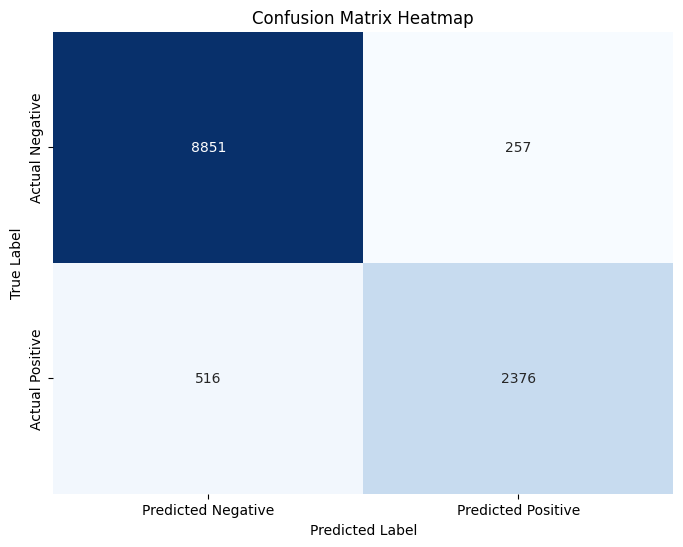

In [18]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()